In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

font_dir = ['C:/python/fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths = font_dir):
    mpl.font_manager.fontManager.addfont(font)

In [2]:
# Set font family globally
mpl.rcParams['font.family'] = 'maruburi'
print(mpl.rcParams['font.family'])

['maruburi']


In [3]:
mpl.rc('axes', unicode_minus = False)

In [4]:
# unicode_minus는 종종 깨지기 때문에 unicode_minus=False 값을 입력해주는 것임

In [5]:
%matplotlib inline

In [6]:
# 위는 주피터 안에서 실행되게 하는 명령어

In [7]:
survey_raw_df = pd.read_csv('C:/python/datas/survey_results_public.csv', 
                            index_col="ResponseId")
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [8]:
schema_raw = pd.read_csv('C:/python/datas/survey_results_schema.csv', 
                         index_col="qname")["question"]
# 뒤에 question 컬럼 단위로 인덱싱을 해준 것 
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [9]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [10]:
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [11]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [12]:
# schema_raw index = qname, values: question
# CompTotal이라 하는 column읭 질문 내용을 확인합니다.
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [13]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [14]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [15]:
pd.set_option('display.max_columns', 78) 
# columns의 개수가 많을 때 한번에 볼 수 있는 컬럼의 크기를 변화시켜줍니다.
# 표현되는 column과 row의 범위를 변경합니다.
# 표현되는 column의 최대 개수

pd.set_option('display.max_rows', 78) 
# 표현되는 row의 최대 개수
# rows에 대해 한번에 출력할 수있는 크기를 조절합니다.

In [16]:
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,

In [17]:
selected_columns = [
    #인구 통계
    "Country",
    "Age",
    "Gender",
    "EdLevel",
    #프로그래밍 경험
    "YearsCode",
    "YearsCodePro",
    "LanguageHaveWorkedWith",
    "LanguageWantToWorkWith",
    "LearnCodeCoursesCert",
    "ProfessionalTech",
    "SOAccount",
    # 고용 관련 정보
    "Employment",
    "DevType",
    "WorkExp",
]

In [18]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [20]:
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


In [21]:
survey_df["YearsCode"].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

In [22]:
def count_nan(Series):
    return len(Series)-Series.count()

# count()함수는 NaN값을 제외한 개수를 반환해준다.

count_nan(survey_df["YearsCode"])

1937

In [23]:
survey_df["YearsCode"].replace("Less than 1 year", 0, inplace=True)
survey_df["YearsCode"].replace("More than 50 years", 51, inplace=True)
survey_df["YearsCode"] = survey_df["YearsCode"].astype("float")

In [24]:
survey_df["YearsCodePro"].replace("Less than 1 year", 0, inplace=True)
survey_df["YearsCodePro"].replace("More than 50 years", 51, inplace=True)
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].astype("float")

In [25]:
survey_df.describe()

# 아래 50%는 median 값과 동일하겠군.

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [26]:
# pd.to_numeric() 메서드에서 error의 값을 
# "coerce"으로 하면 숫자로 바꿀 수 없는 값을 NaN으로 처리합니다.
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [27]:
schema_raw["Gender"]

'Which of the following describe you, if any? Please check all that apply.'

In [28]:
survey_df["Gender"].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [29]:
# np.nan 값이 섞인 Series 자료형에 대해 특정 문자 값이 포함되었는지
# 사용할 수 있는 메서드로 contains()가 있음.
'''
Series.str.contains()
'''

'\nSeries.str.contains()\n'

In [30]:
# 첫 인자로 bool Series를 받을 수 있고, 그 Series의 각 row 값이
# False인 경우에 두번째 인수로 넘겨준 값으로 변경을 함.
# 즉, False일 때만 값을 변경하는데, 변경하는 값은 두번째 인수의 값으로 변경
'''
DataFrame.where()
'''

'\nDataFrame.where()\n'

In [31]:
survey_df.where(-(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)

In [32]:
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

# 데이터 시각화

In [33]:
%matplotlib inline
#매직 명령어를 통해서 주피어 내에 그래프가 잘 출력되도록 설정합니다.

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] = '#ffffff' # 숫자가 작을수록 검은색에 가까워진다.

# set_style() 메서드를 통해서 그림의 스타일을 일괄 적용
# rcParams의 값도 필요에 따라 지정
# - font.size: 기본 폰트의 크기를 적용
# - figure.figsize: 기본 figure의 사이즈를 적용
# - figure.facecolor: 기본 figure 내 배경 색상을 흰색(#ffffff)으로 적용

In [34]:
mpl.rcParams["axes.facecolor"] = "white"

In [35]:
print(plt.style.available)
# plt.style.available은 matplotlib.pyplot에 
# style을 적용할 수 있는 것들에 대한 리스트를 조회할 수 있다. 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [36]:
plt.style.use("default")
# - plt.style.use(“원하는스타일”): 스타일을 적용 
# “default” 값을 인수로 쓰면 스타일을 적용하기 전 원래의 스타일로 적용
# use() 메서드에 plt.style.available 속성으로 얻은 리스트의 요소를 넣어주면
# 그에 해당하는 스타일이 적용됨

In [37]:
# plt.style.use('Solarize_Light2')

In [38]:
mpl.rcParams["font.family"] = "NanumGothic"
mpl.rcParams["axes.unicode_minus"] = False 

# - font.family: 기본 폰트 종류를 적용합니다.
# - axes.unicode_minus: False로 설정 시 마이너스 기호를 ASCII로 합니다.

In [39]:
# stack overflow의 커뮤니티 특성상 갖게되는 데이터의 편향적 특징에 대해 살펴보자.
# 우선 응답자가 거주하는 국가가 무엇인지 분포를 파악해보도록 하자.

In [40]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [41]:
survey_df['Country'].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [42]:
survey_df['Country'].nunique()
# Country에 대한 유일한 값의 개수를 확인
# NaN 값은 count에 포함되지 않음
# DataFrame.nunique()

180

In [43]:
a = survey_df['Country'].value_counts().head(15)
a

# value_counts는 sort=True라서 내림차순으로 결과를 줌
# counts()는 NaN을 제외한 결과를 주는데 value_counts도 같은 맥락

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

In [44]:
sns.set_style('darkgrid')

In [58]:
font_dir = ['C:/python/fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths = font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)
# fonts 파일이 증발해서 강사님 도움으로 겨우 해결....
mpl.rcParams['font.family'] = 'NanumSquare'

NanumBarunGothic
NanumSquare_ac
NanumSquareOTF
Nanum Brush Script OTF
NanumSquareOTF
NanumSquareRoundOTF
NanumSquare Neo Regular
NanumBarunpen
NanumGothic
NanumBarunGothicOTF
NanumGothic Eco
NanumMyeongjo Eco
NanumMyeongjo Eco
NanumGothicOTF Eco
NanumBarunGothic
NanumSquareOTF
NanumBarunGothicOTF
NanumSquareOTF
NanumSquare
NanumSquareRound
NanumBarunGothicOTF
D2Coding
D2Coding ligature
D2Coding ligature
NanumBarunGothic
NanumGothic Eco
NanumMyeongjo
NanumGothic
NanumSquareRound
NanumMyeongjoOTF Eco
NanumSquareOTF_ac
NanumGothicOTF Eco
Nanum Pen Script OTF
NanumBarunGothic
NanumSquareRoundOTF
NanumMyeongjoOTF
NanumSquareOTF_ac
NanumSquareOTF_ac
NanumBarunpenOTF
NanumGothicOTF
NanumSquare Neo OTF ExtraBold
Nanum Brush Script
NanumGothicOTF
NanumMyeongjoOTF Eco
NanumBarunpen
NanumSquare Neo OTF Light
NanumGothic
NanumSquare
NanumGothic Eco
NanumSquare
NanumSquare Neo Heavy
NanumSquareRound
NanumSquare Neo OTF Bold
NanumBarunGothic YetHangul
NanumSquare Neo OTF Heavy
NanumSquare Neo ExtraB

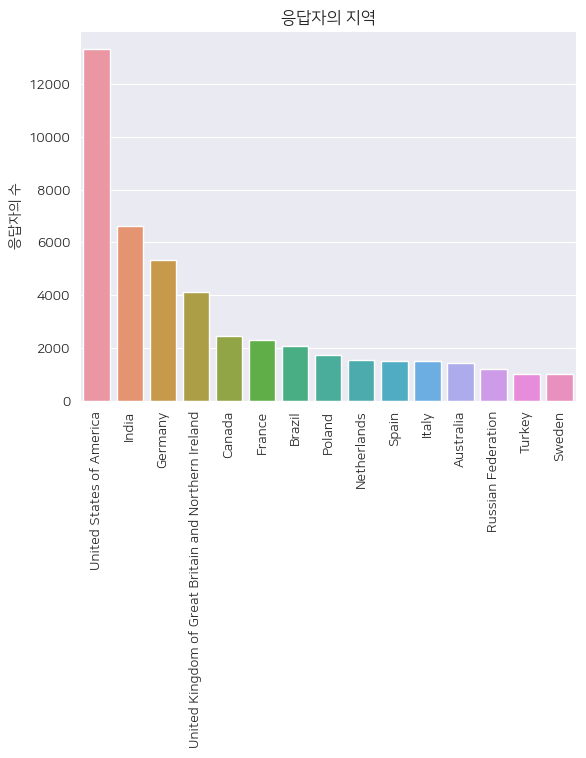

In [59]:
sns.barplot(x = a.index, y = a)

plt.title('응답자의 지역')
plt.xticks(rotation = 90)
plt.ylabel('응답자의 수')
plt.show()

In [ ]:
# Stack Overflow Annual Developer Survey가 영어로 진행되고, 
# 또 이들 국가의 영어 사용 인구가 가장 많기 때문에 응답자의 비율이 
# 미국과 인도에서 불균형적으로 높은 것으로 보입니다. 
# 즉 이 설문 조사는 특히 비영어권 국가의 글로벌 프로그래밍 커뮤니티를 
# 대표하지 않을 수 있음을 이미 알 수 있습니다. 
# 비영어권 국가의 프로그래머 응답자 수가 거의 확실하게 부족합니다.

In [87]:
schema_raw["Age"]

'What is your age?'

In [88]:
count_nan(survey_df["Age"])

3011

In [89]:
age_counts = survey_df["Age"].value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [90]:
survey_df["Age"].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [91]:
survey_df["Age"].nunique()

8

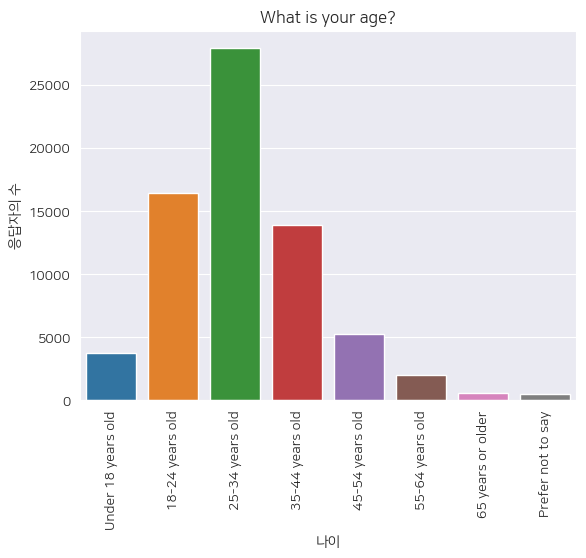

In [98]:
order = [
    'Under 18 years old', 
    '18-24 years old',
    '25-34 years old',
    '35-44 years old', 
    '45-54 years old', 
    '55-64 years old',
    '65 years or older', 
    'Prefer not to say']

sns.barplot(x = age_counts.index, y = age_counts.values, order = order)
plt.title('What is your age?')
plt.xticks(rotation = 90)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

In [102]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [103]:
gender_counts = survey_df['Gender'].value_counts(True)
gender_counts

Man                                                  0.920839
Woman                                                0.048446
Prefer not to say                                    0.016704
Non-binary, genderqueer, or gender non-conforming    0.010034
Or, in your own words:                               0.003977
Name: Gender, dtype: float64

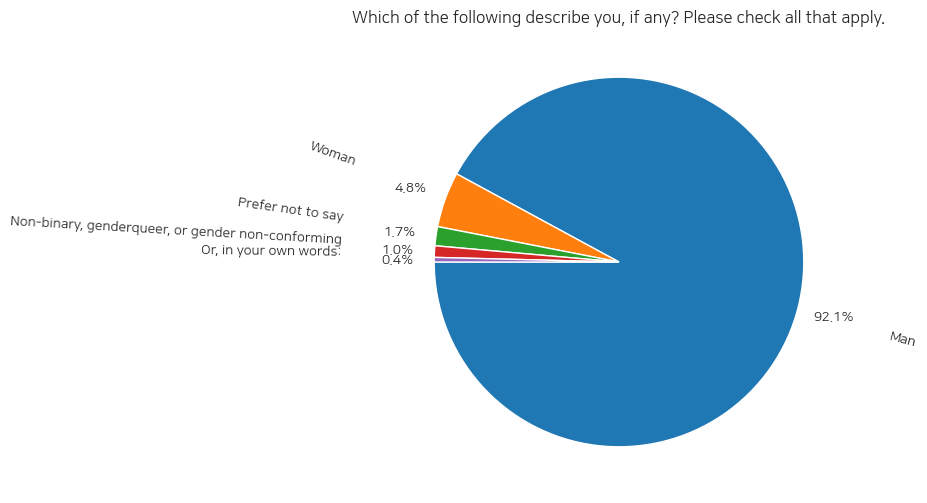

In [116]:
plt.figure(figsize=(6, 6))
plt.title(schema_raw.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180,
        labeldistance=1.5, pctdistance=1.2, rotatelabels=True)
# labeldistance: label의 pie 차트 중심으로부터의 거리
# pctdistance: 값의 pie 차트 중심으로부터의 거리
# rotatelabels: True일 때 label을 회전시켜서 출력합니다.
plt.show()
# Data_visualize 0313 파이차트 부분에서 배움

In [ ]:
# 응답자 중 약 8%만 남성이 아닌 여성 혹은 논바이너리라고 밝혔습니다.
# 이 Stack overflow 커뮤니티의 대다수의 응답이 남성으로부터 나온 것이라는 것을
# 확인할 수 있었습니다.

In [138]:
schema_raw["EdLevel"]

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [139]:
survey_df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

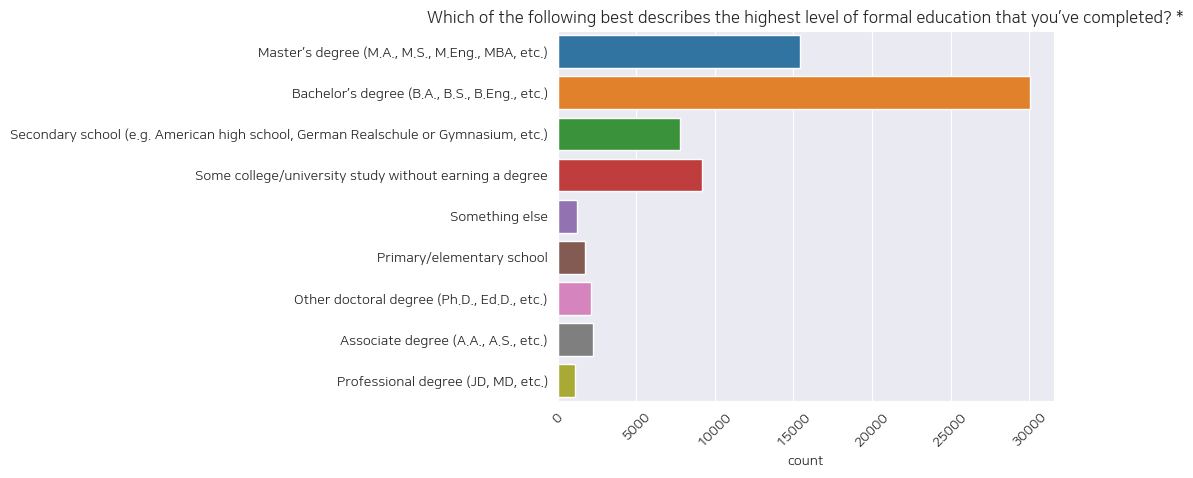

In [140]:
sns.countplot(data = survey_df, y = survey_df["EdLevel"])
plt.title(schema_raw["EdLevel"])
plt.ylabel(None)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 응답자의 상당수가 학사 학위 혹은 석사 학위 소지자임을 확인할 수 있었습니다.
# stack overflow를 사용하는 사람은 어느 정도 대학 교육을 받은 것으로 보입니다.
# 위 그래프로는 비율을 파악하기는 쉽지 않아 보입니다. 
# x축이 비율을 나타내도록 변경해보겠습니다.

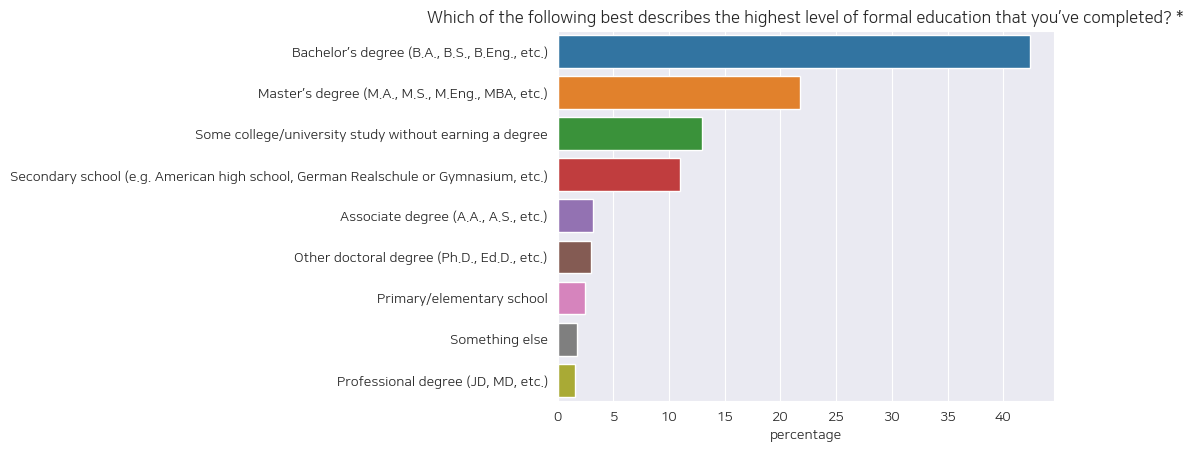

In [146]:
change_x = survey_df["EdLevel"].value_counts(True) * 100
change_x                                 # True는 비율

sns.barplot(x = change_x, y = change_x.index)
plt.title(schema_raw["EdLevel"])
plt.xlabel('percentage')
plt.ylabel(None)
plt.show()

In [ ]:
# 응답자의 40% 이상이 학사 학위를 소지하고 있는 것을 쉽게 확인할 수 있었습니다.
# 또 약 22%가 석사 학위를 소지하고 있는 것을 확인할 수 있었습니다.
# stack overflow의 설문 응답자 중 약 66%는 어느 정도의 대학 교육을 받은 것으로 확인됐습니다.

In [147]:
schema_raw["Employment"]

'Which of the following best describes your current employment status?'

In [148]:
survey_df["Employment"].value_counts()

Employed, full-time                                                                                               42644
Student, full-time                                                                                                 6663
Independent contractor, freelancer, or self-employed                                                               4941
Employed, full-time;Independent contractor, freelancer, or self-employed                                           3456
Not employed, but looking for work                                                                                 1810
                                                                                                                  ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                       1
Employed, full-time;Student, full-time;Student, part-time;Independent contractor, freelancer, or self-employed        1
Employed, part-time;Not employed, and no

In [ ]:
sns.barplot(x = age_counts.index, y = age_counts.valuesr)
plt.title('What is your age?')
plt.xticks(rotation = 90)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

Text(0.5, 0, 'percentage')

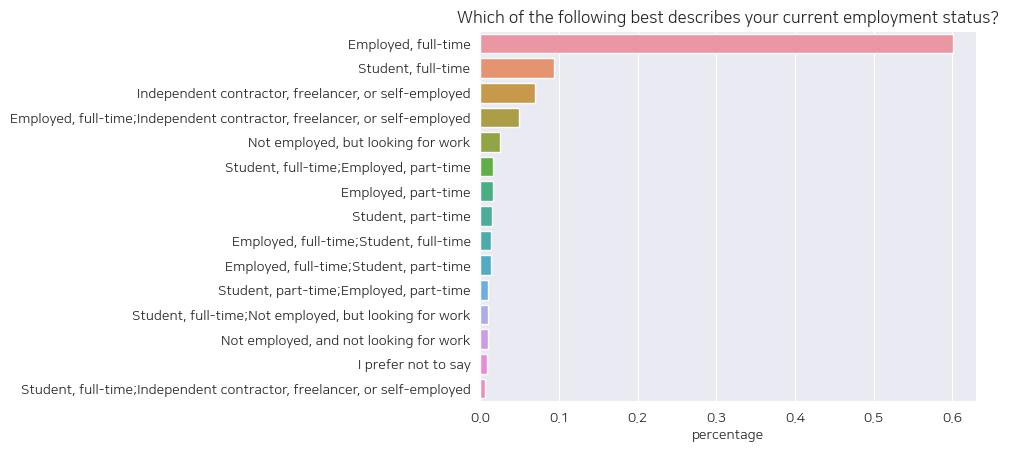

In [149]:
employment = survey_df["Employment"].value_counts(True, ascending=False).head(15) 
sns.barplot(x=employment, y=employment.index)
plt.title(schema_raw.Employment)
plt.xlabel('percentage')

In [ ]:
# Employment의 데이터 분포를 확인해본 결과 풀타임 고용 형태가 제일 많은 것으로 
# 집계된 것을 확인할 수 있었습니다.
# 이 Employment에 대한 설문은 복수의 답을 할 수 있어서 독특한 분포를 보이는데, 
# 약 70%인 풀타임 근무를 제외하면 약 30%가 다양한 고용 형태로 일하고 있음을 
# 확인할 수 있겠습니다.

In [151]:
schema_raw.DevType

'Which of the following describes your current job? Please select all that apply.'

In [152]:
survey_df.DevType.count()

60761

In [154]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7091
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5274
Developer, front-end                                                                                                                            

In [155]:
def split_multicolumn(col_series):
    # 반환할 DataFrame
    result_df = col_series.to_frame()
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    
    # NaN 값을 갖는 row를 제외하고 반봅
    for idx, value in col_series[col_series.notnull()].items():
        
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            
            # 파싱한 기술 스택에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True와 같은 결과
    
    return result_df[options]

In [156]:
survey_df["DevType"].loc[73268]

'Developer, front-end;Engineer, data;Engineer, site reliability;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test;Student;Developer, mobile;Academic researcher;DevOps specialist;Developer, embedded applications or devices;Developer, game or graphics;Cloud infrastructure engineer;Data or business analyst;Designer;Scientist;Product manager;System administrator'